In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def manhattan(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

In [104]:
N = 50

def proba(dist, alpha):
    return np.where(dist <= 1, 0, dist**(-alpha))

distances = np.zeros((N*2+1, N*2+1))
for i in range(N*2+1):
    for j in range(N*2+1):
        x = i - N
        y = j - N
        distances[i, j] = manhattan(0, 0, x, y)

uprob = proba(distances, 1)
nprob = uprob / np.sum(uprob)
flatprob = nprob.flatten()
index = np.arange(len(flatprob))

/tmp/ipykernel_208379/2614059964.py:4: RuntimeWarning: divide by zero encountered in reciprocal
  return np.where(dist <= 1, 0, dist**(-alpha))


In [125]:
def proba_view(gx, gy):
    assert 0 <= gx < N
    assert 0 <= gy < N
    sx = N - gx
    sy = N - gy
    return uprob[sx:sx+N, sy:sy+N]


def sample_offset():
    choice = np.random.choice(index, p=flatprob)
    dx, dy = np.unravel_index(choice, (N*2+1, N*2+1))
    return dx, dy


min_Zf = np.sum(proba_view(0,0))
Zg = np.sum(uprob)
M = Zg / min_Zf
print("M =", M)


def criterion(gx, gy):
    if not (0 <= gx < N and 0 <= gy < N):
        return 0
    _Zf = np.sum(proba_view(gx, gy))
    threshold =  Zg / (_Zf*M)
    return threshold
    

def rej_sample(gx, gy):
    sample = (-1, -1)
    while np.random.uniform() > criterion(*sample):
        offset = sample_offset()
        sample = (gx + offset[0] - N, gy + offset[1] - N)
    return sample



GX, GY = 25, 17
q = np.zeros((N, N))
for _ in range(1000000):
    i,j = rej_sample(GX, GY)
    q[i,j] += 1
q /= np.sum(q)



M = 3.881421369657451


In [ ]:
def exact_sample(gx, gy):
    p = proba_view(gx, gy).copy()
    p /= np.sum(p)
    p = p.flatten()
    index = np.arange(len(p))
    i, j = np.unravel_index(np.random.choice(index, p=p), (N, N))
    return i, j

exact_sample(5,5)

(5, 24)

In [ ]:
ref = np.zeros((N, N))
for _ in range(1000000):
    i,j = exact_sample(GX, GY)
    ref[i,j] += 1
ref /= np.sum(ref)

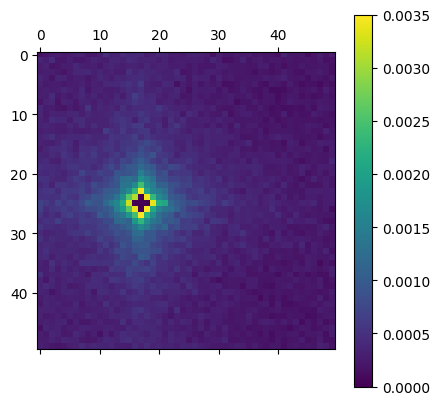

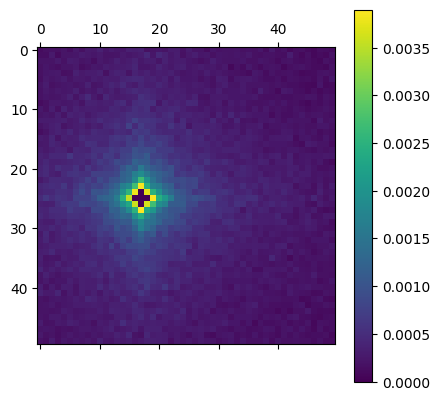

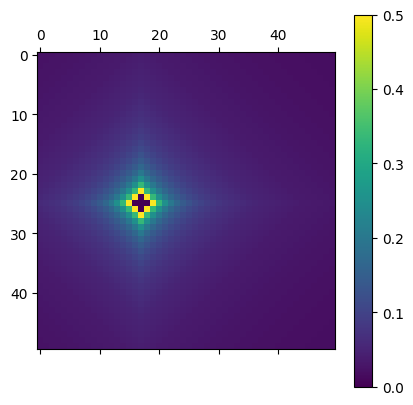

/tmp/ipykernel_208379/2520215018.py:13: RuntimeWarning: invalid value encountered in true_divide
  plt.matshow((q - ref)/proba_view(GX, GY))


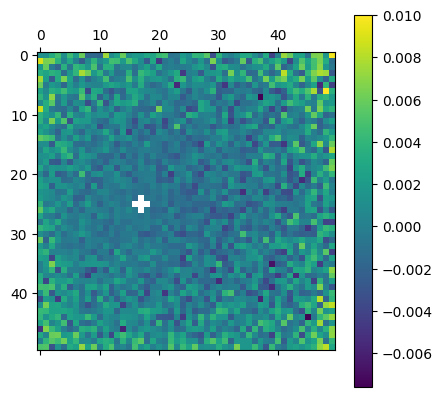

In [ ]:
plt.matshow(q)
plt.colorbar()
plt.show()

plt.matshow(ref)
plt.colorbar()
plt.show()

plt.matshow(proba_view(GX, GY))
plt.colorbar()
plt.show()

plt.matshow((q - ref)/proba_view(GX, GY))
plt.colorbar()
plt.show()
